In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import our datasets
Cab_data = pd.read_csv('datasets/Cab_Data.csv')
Customer_data = pd.read_csv('datasets/Customer_ID.csv')
Transactions_data = pd.read_csv('datasets/Transaction_ID.csv')
City_data = pd.read_csv('datasets/City.csv')

In [3]:
#View the shape of the data
Cab_data.shape,Customer_data.shape,Transactions_data.shape,City_data.shape

((359392, 7), (49171, 4), (440098, 3), (20, 3))

In [4]:
#View first five data in the dataset
Cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [5]:
Customer_data.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [6]:
Transactions_data.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [7]:
City_data.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [8]:
# Created a function to get necessary information from the data set in a dataframe
def get_data_info(data):
    dataset_info = pd.DataFrame(index=data.columns)
    dataset_info['Data_type'] = data.dtypes
    dataset_info['Total Value'] = data.count()
    dataset_info['Null_count'] = data.isnull().sum()
    dataset_info['Unique_count'] = data.nunique()
    return dataset_info

In [9]:
get_data_info(Cab_data)

,Data_type,Total Value,Null_count,Unique_count
Transaction ID,int64,359392,0,359392
Date of Travel,int64,359392,0,1095
Company,object,359392,0,2
City,object,359392,0,19
KM Travelled,float64,359392,0,874
Price Charged,float64,359392,0,99176
Cost of Trip,float64,359392,0,16291


In [10]:
Cab_data.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


In [11]:
# How many cabs do each company have?
Cab_data.groupby('Company').size()

Company
Pink Cab       84711
Yellow Cab    274681
dtype: int64

In [12]:
Transactions = pd.merge(Customer_data, Transactions_data,on='Customer ID')
Transactions

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode
0,29290,Male,28,10813,10000011,Card
1,29290,Male,28,10813,10351127,Cash
2,29290,Male,28,10813,10412921,Card
3,27703,Male,27,9237,10000012,Card
4,27703,Male,27,9237,10320494,Card
...,...,...,...,...,...,...
440093,12490,Male,33,18713,10439799,Cash
440094,14971,Male,30,15346,10439820,Card
440095,41414,Male,38,3960,10439838,Card
440096,41677,Male,23,19454,10439840,Cash


In [13]:
Transactions2 = pd.merge(Transactions, Cab_data,on='Transaction ID')
Transactions2

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,29290,Male,28,10813,10000011,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,29290,Male,28,10813,10351127,Cash,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228
2,29290,Male,28,10813,10412921,Card,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020
3,27703,Male,27,9237,10000012,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
4,27703,Male,27,9237,10320494,Card,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,38520,Female,42,19417,10439790,Card,43107,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144
359388,12490,Male,33,18713,10439799,Cash,43103,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720
359389,41414,Male,38,3960,10439838,Card,43104,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600
359390,41677,Male,23,19454,10439840,Cash,43106,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600


In [498]:
Final_Cab_Data = pd.merge(Transactions2, City_data,on='City')
Final_Cab_Data

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,29290,Male,28,10813,10000011,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701"
1,29290,Male,28,10813,10351127,Cash,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701"
2,29290,Male,28,10813,10412921,Card,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701"
3,27703,Male,27,9237,10000012,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701"
4,27703,Male,27,9237,10320494,Card,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,51406,Female,29,6829,10307228,Cash,43162,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,"418,859","127,001"
359388,51406,Female,29,6829,10319775,Cash,43203,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,"418,859","127,001"
359389,51406,Female,29,6829,10347676,Card,43287,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,"418,859","127,001"
359390,51406,Female,29,6829,10358624,Cash,43314,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,"418,859","127,001"


In [499]:
Final_Cab_Data.describe()

,Customer ID,Age,Income (USD/Month),Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,19191.652115,35.336705,15048.822937,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,21012.412463,12.594234,7969.409482,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000000,18.000000,2000.000000,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,2705.000000,25.000000,8424.000000,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,7459.000000,33.000000,14685.000000,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,36078.000000,42.000000,21035.000000,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,60000.000000,65.000000,35000.000000,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


In [500]:
get_data_info(Final_Cab_Data)

,Data_type,Total Value,Null_count,Unique_count
Customer ID,int64,359392,0,46148
Gender,object,359392,0,2
Age,int64,359392,0,48
Income (USD/Month),int64,359392,0,22725
Transaction ID,int64,359392,0,359392
Payment_Mode,object,359392,0,2
Date of Travel,int64,359392,0,1095
Company,object,359392,0,2
City,object,359392,0,19
KM Travelled,float64,359392,0,874


In [501]:
# Data is clean, let's change Date of Travel to date

In [502]:
import datetime
new_form = []
def date_to_string(digit_date):
    for d in digit_date:
        try:
            x = datetime.date(1899,12,30) + datetime.timedelta(days=float(d))
            new_form.append(x.strftime('%Y-%m-%d'))
        except:
            new_form.append('n/a')
    return new_form

In [503]:
Final_Cab_Data['Date of Travel'] = date_to_string(Final_Cab_Data['Date of Travel'])

In [504]:
Final_Cab_Data.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,29290,Male,28,10813,10000011,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701"
1,29290,Male,28,10813,10351127,Cash,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701"
2,29290,Male,28,10813,10412921,Card,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701"
3,27703,Male,27,9237,10000012,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701"
4,27703,Male,27,9237,10320494,Card,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701"


In [505]:
get_data_info(Final_Cab_Data)

,Data_type,Total Value,Null_count,Unique_count
Customer ID,int64,359392,0,46148
Gender,object,359392,0,2
Age,int64,359392,0,48
Income (USD/Month),int64,359392,0,22725
Transaction ID,int64,359392,0,359392
Payment_Mode,object,359392,0,2
Date of Travel,object,359392,0,1095
Company,object,359392,0,2
City,object,359392,0,19
KM Travelled,float64,359392,0,874


In [506]:
Final_Cab_Data['Date of Travel'] = pd.to_datetime(Final_Cab_Data['Date of Travel'])

In [507]:
get_data_info(Final_Cab_Data)

,Data_type,Total Value,Null_count,Unique_count
Customer ID,int64,359392,0,46148
Gender,object,359392,0,2
Age,int64,359392,0,48
Income (USD/Month),int64,359392,0,22725
Transaction ID,int64,359392,0,359392
Payment_Mode,object,359392,0,2
Date of Travel,datetime64[ns],359392,0,1095
Company,object,359392,0,2
City,object,359392,0,19
KM Travelled,float64,359392,0,874


In [508]:
Final_Cab_Data['Year'] = Final_Cab_Data['Date of Travel'].dt.year

In [509]:
Final_Cab_Data.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Year
0,29290,Male,28,10813,10000011,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",2016
1,29290,Male,28,10813,10351127,Cash,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701",2018
2,29290,Male,28,10813,10412921,Card,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701",2018
3,27703,Male,27,9237,10000012,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",2016
4,27703,Male,27,9237,10320494,Card,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701",2018


In [510]:
Final_Cab_Data['Profit'] = Final_Cab_Data['Price Charged'] - Final_Cab_Data['Cost of Trip']

In [511]:
Final_Cab_Data['Profit/KM'] = Final_Cab_Data['Profit'] / Final_Cab_Data['KM Travelled']

In [512]:
Final_Cab_Data.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Year,Profit,Profit/KM
0,29290,Male,28,10813,10000011,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",2016,57.3150,1.882266
1,29290,Male,28,10813,10351127,Cash,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701",2018,281.2772,10.739870
2,29290,Male,28,10813,10412921,Card,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701",2018,194.6480,4.574571
3,27703,Male,27,9237,10000012,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",2016,23.6660,0.826904
4,27703,Male,27,9237,10320494,Card,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701",2018,253.9808,6.981330


In [351]:
Average_Profit_Per_KM = Final_Cab_Data.groupby(['Company','Year']).mean()['Profit/KM'].unstack('Company').reset_index()
Average_Profit_Per_KM

Company,Year,Pink Cab,Yellow Cab
0,2016,3.026813,7.489847
1,2017,2.962883,7.494612
2,2018,2.350447,6.364805


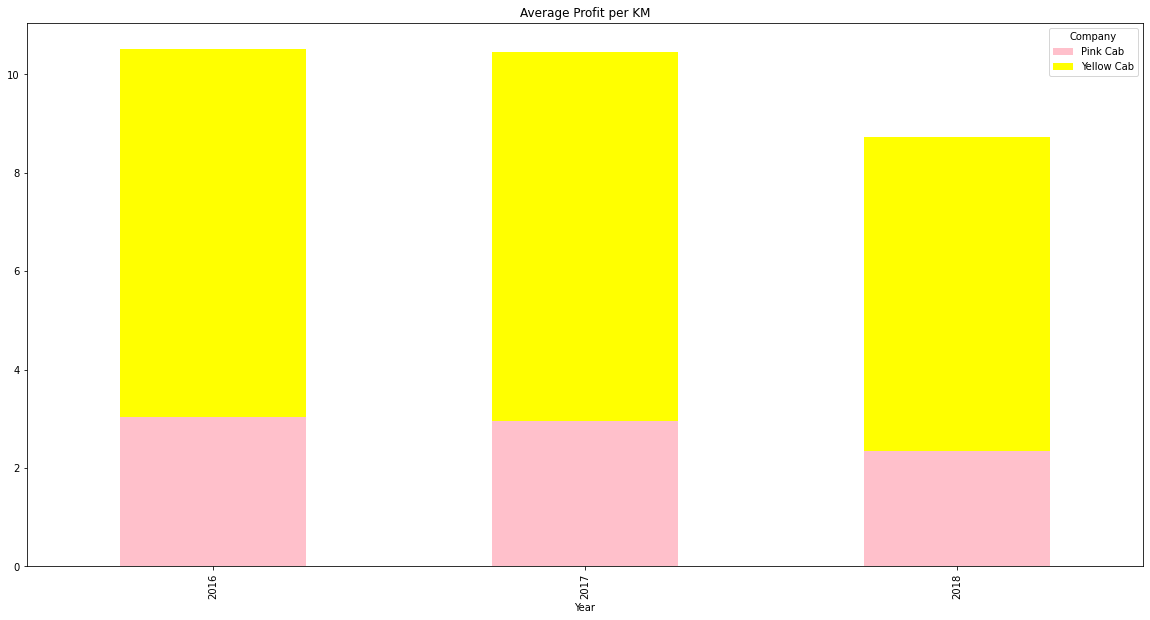

In [379]:
Average_Profit_Per_KM.plot(x='Year',kind='bar',stacked=True,title='Average Profit per KM',color=['pink','yellow'])
plt.show()

In [348]:
Final_Cab_Data['Profit_Margin'] = Final_Cab_Data['Cost of Trip']/Final_Cab_Data['Price Charged']
Final_Cab_Data.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Year,Profit,Profit/KM,Profit_Margin
0,29290,Male,28,10813,10000011,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",2016,57.3150,1.882266,0.845491
1,29290,Male,28,10813,10351127,Cash,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701",2018,281.2772,10.739870,0.530187
2,29290,Male,28,10813,10412921,Card,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701",2018,194.6480,4.574571,0.754248
3,27703,Male,27,9237,10000012,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",2016,23.6660,0.826904,0.933990
4,27703,Male,27,9237,10320494,Card,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701",2018,253.9808,6.981330,0.647787


In [336]:
Profit_per_year = Final_Cab_Data.groupby(['Year','Company']).sum()[['Profit','Cost of Trip','Price Charged']].reset_index()
Profit_per_year

,Year,Company,Profit,Cost of Trip,Price Charged
0,2016,Pink Cab,1.713511e+06,6.194968e+06,7908479.23
1,2016,Yellow Cab,1.392700e+07,2.455414e+07,38481133.18
2,2017,Pink Cab,2.033655e+06,7.544975e+06,9578629.54
3,2017,Yellow Cab,1.657598e+07,2.924293e+07,45818910.04
4,2018,Pink Cab,1.560162e+06,7.280980e+06,8841142.56
5,2018,Yellow Cab,1.351740e+07,2.803644e+07,41553843.97


In [319]:
Total_profit_per_year = Profit_per_year.groupby('Year').sum().reset_index()
Total_profit_per_year

,Year,Profit,Cost of Trip,Price Charged
0,2016,1.564051e+07,3.074911e+07,46389612.41
1,2017,1.860963e+07,3.678791e+07,55397539.58
2,2018,1.507756e+07,3.531742e+07,50394986.53


In [322]:
Total_profit_per_year.rename(columns={"Profit": "Total_Profit","Cost of Trip": "Total_Cost_of_Trip","Price Charged": "Total_Price_Charged"},inplace=True)
Total_profit_per_year

,Year,Total_Profit,Total_Cost_of_Trip,Total_Price_Charged
0,2016,1.564051e+07,3.074911e+07,46389612.41
1,2017,1.860963e+07,3.678791e+07,55397539.58
2,2018,1.507756e+07,3.531742e+07,50394986.53


In [323]:
Profit_per_year_table = pd.merge(Profit_per_year, Total_profit_per_year,on='Year')
Profit_per_year_table

,Year,Company,Profit,Cost of Trip,Price Charged,Total_Profit,Total_Cost_of_Trip,Total_Price_Charged
0,2016,Pink Cab,1.713511e+06,6.194968e+06,7908479.23,1.564051e+07,3.074911e+07,46389612.41
1,2016,Yellow Cab,1.392700e+07,2.455414e+07,38481133.18,1.564051e+07,3.074911e+07,46389612.41
2,2017,Pink Cab,2.033655e+06,7.544975e+06,9578629.54,1.860963e+07,3.678791e+07,55397539.58
3,2017,Yellow Cab,1.657598e+07,2.924293e+07,45818910.04,1.860963e+07,3.678791e+07,55397539.58
4,2018,Pink Cab,1.560162e+06,7.280980e+06,8841142.56,1.507756e+07,3.531742e+07,50394986.53
5,2018,Yellow Cab,1.351740e+07,2.803644e+07,41553843.97,1.507756e+07,3.531742e+07,50394986.53


In [363]:
Profit_per_year_table['Profit_Percent'] = ((Profit_per_year_table['Price Charged'] - Profit_per_year_table['Cost of Trip']) / Profit_per_year_table['Price Charged']*100)
Profit_per_year_table

,Year,Company,Profit,Cost of Trip,Price Charged,Total_Profit,Total_Cost_of_Trip,Total_Price_Charged,Profit_Percent
0,2016,Pink Cab,1.713511e+06,6.194968e+06,7908479.23,1.564051e+07,3.074911e+07,46389612.41,21.666760
2,2017,Pink Cab,2.033655e+06,7.544975e+06,9578629.54,1.860963e+07,3.678791e+07,55397539.58,21.231168
4,2018,Pink Cab,1.560162e+06,7.280980e+06,8841142.56,1.507756e+07,3.531742e+07,50394986.53,17.646613
1,2016,Yellow Cab,1.392700e+07,2.455414e+07,38481133.18,1.564051e+07,3.074911e+07,46389612.41,36.191750
3,2017,Yellow Cab,1.657598e+07,2.924293e+07,45818910.04,1.860963e+07,3.678791e+07,55397539.58,36.177155
5,2018,Yellow Cab,1.351740e+07,2.803644e+07,41553843.97,1.507756e+07,3.531742e+07,50394986.53,32.529842


In [364]:
Profit_per_year_table = Profit_per_year_table.sort_values(by=['Company'])
Profit_per_year_table

,Year,Company,Profit,Cost of Trip,Price Charged,Total_Profit,Total_Cost_of_Trip,Total_Price_Charged,Profit_Percent
0,2016,Pink Cab,1.713511e+06,6.194968e+06,7908479.23,1.564051e+07,3.074911e+07,46389612.41,21.666760
2,2017,Pink Cab,2.033655e+06,7.544975e+06,9578629.54,1.860963e+07,3.678791e+07,55397539.58,21.231168
4,2018,Pink Cab,1.560162e+06,7.280980e+06,8841142.56,1.507756e+07,3.531742e+07,50394986.53,17.646613
1,2016,Yellow Cab,1.392700e+07,2.455414e+07,38481133.18,1.564051e+07,3.074911e+07,46389612.41,36.191750
3,2017,Yellow Cab,1.657598e+07,2.924293e+07,45818910.04,1.860963e+07,3.678791e+07,55397539.58,36.177155
5,2018,Yellow Cab,1.351740e+07,2.803644e+07,41553843.97,1.507756e+07,3.531742e+07,50394986.53,32.529842


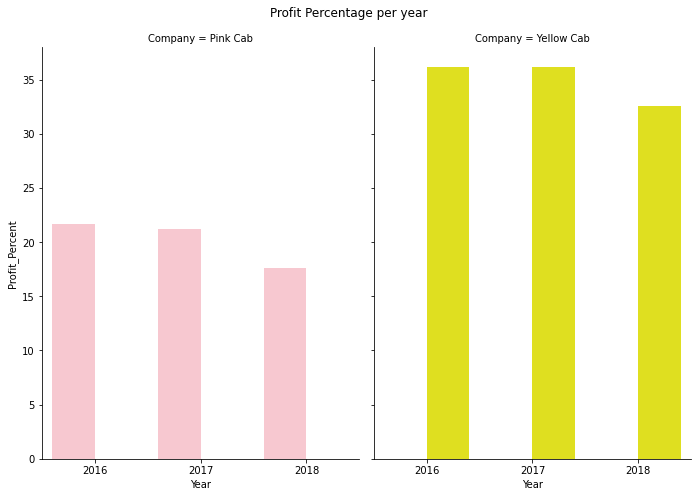

In [920]:
g = sns.catplot(x="Year", y="Profit_Percent",
                hue="Company", col="Company",
                data=Profit_per_year_table, kind="bar",
                height=7, aspect=.7,
                palette=sns.color_palette(['pink', 'yellow'])
                );
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Profit Percentage per year')
plt.show()

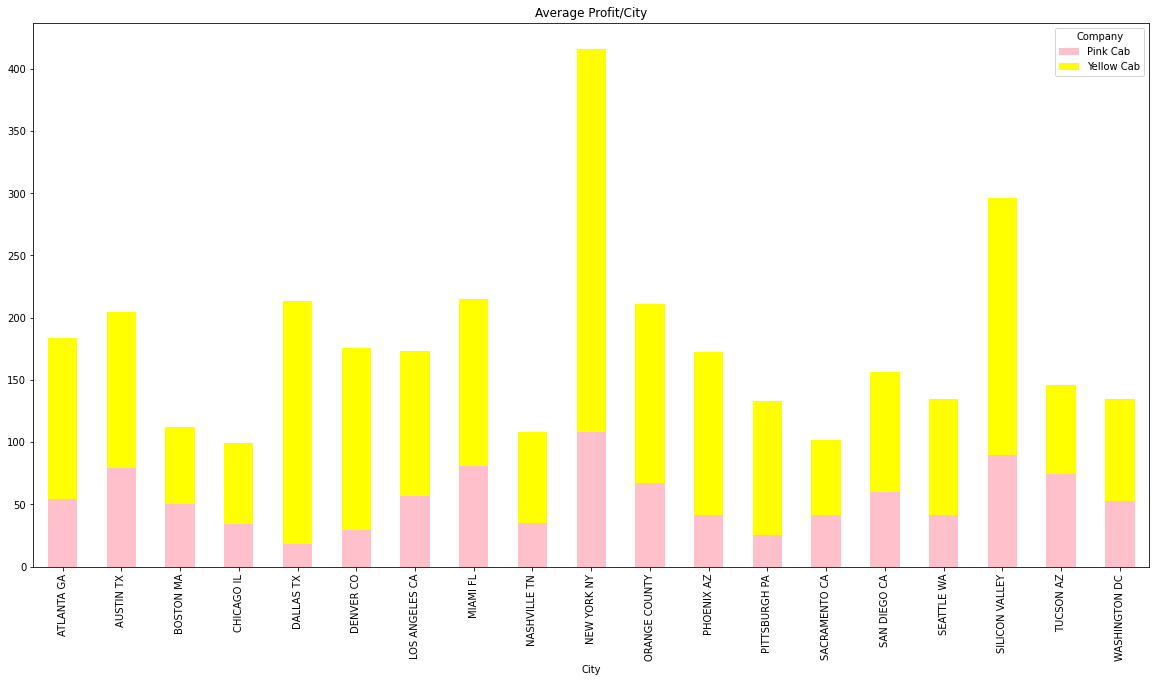

In [390]:
Profit_per_city.plot(x='City',kind='bar',stacked=True,title='Average Profit/City',color=['pink','yellow'])
plt.show()

In [408]:
Company_Profit = Final_Cab_Data.groupby('Company').sum()['Profit'].reset_index()
Company_Profit

,Company,Profit
0,Pink Cab,5.307328e+06
1,Yellow Cab,4.402037e+07


In [411]:
Company_Rides = Final_Cab_Data.groupby('Company').count()['Transaction ID'].reset_index()
Company_Rides

,Company,Transaction ID
0,Pink Cab,84711
1,Yellow Cab,274681


In [412]:
Company_data = pd.merge(Company_Profit, Company_Rides,on='Company')
Company_data

,Company,Profit,Transaction ID
0,Pink Cab,5.307328e+06,84711
1,Yellow Cab,4.402037e+07,274681


In [413]:
Company_data.rename(columns={"Transaction ID": "Total Rides"},inplace=True)
Company_data

,Company,Profit,Total Rides
0,Pink Cab,5.307328e+06,84711
1,Yellow Cab,4.402037e+07,274681


In [414]:
Company_data['Profit/Ride'] = Company_data['Profit']/Company_data['Total Rides']
Company_data

,Company,Profit,Total Rides,Profit/Ride
0,Pink Cab,5.307328e+06,84711,62.652174
1,Yellow Cab,4.402037e+07,274681,160.259986


In [420]:
Profit_per_year_table.head()

,Year,Company,Profit,Cost of Trip,Price Charged,Total_Profit,Total_Cost_of_Trip,Total_Price_Charged,Profit_Percent
0,2016,Pink Cab,1.713511e+06,6.194968e+06,7908479.23,1.564051e+07,3.074911e+07,46389612.41,21.666760
2,2017,Pink Cab,2.033655e+06,7.544975e+06,9578629.54,1.860963e+07,3.678791e+07,55397539.58,21.231168
4,2018,Pink Cab,1.560162e+06,7.280980e+06,8841142.56,1.507756e+07,3.531742e+07,50394986.53,17.646613
1,2016,Yellow Cab,1.392700e+07,2.455414e+07,38481133.18,1.564051e+07,3.074911e+07,46389612.41,36.191750
3,2017,Yellow Cab,1.657598e+07,2.924293e+07,45818910.04,1.860963e+07,3.678791e+07,55397539.58,36.177155


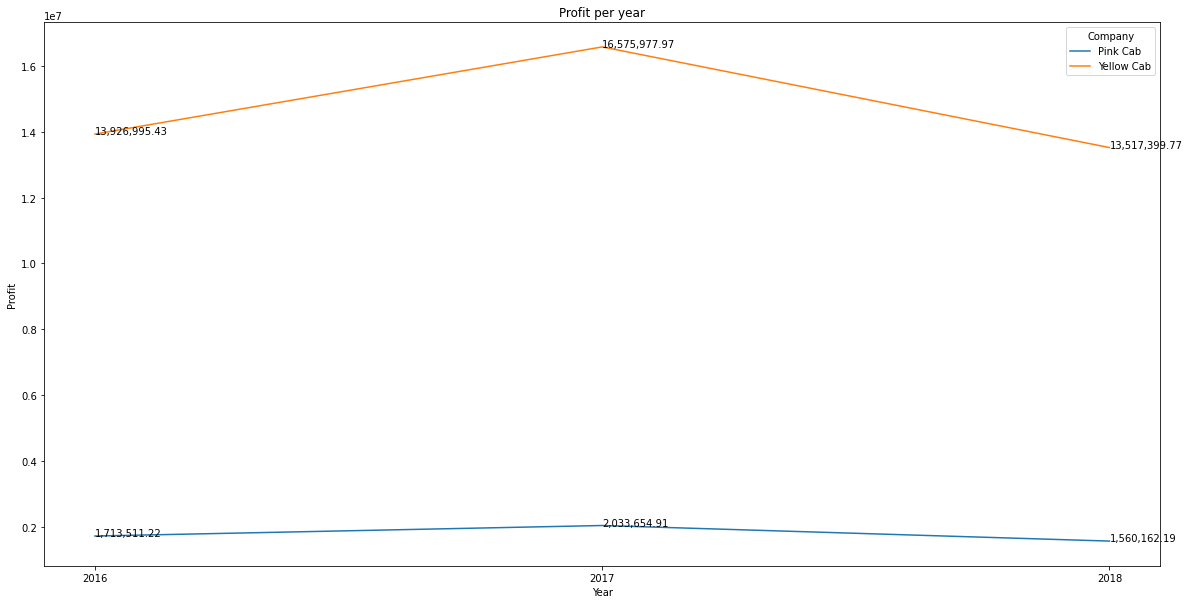

In [927]:
g = sns.lineplot(data=Profit_per_year_table, x="Year", y="Profit", hue="Company")
g.set(title='Profit per year')
g.set(xticks=([2016, 2017, 2018]))
# label points on the plot
for x, y in zip(Profit_per_year_table['Year'], Profit_per_year_table['Profit']):
     # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
    plt.text(x = x, # x-coordinate position of data label
    y = y, # y-coordinate position of data label, adjusted to be 150 below the data point
    s = '{0:,.2f}'.format(y), # data label, formatted to ignore decimals
    color = 'black') # set colour of line
plt.show() 

In [480]:
Profit_per_gender = Final_Cab_Data.groupby(['Year','Company','Gender']).sum()['Profit'].reset_index()
Profit_per_gender

,Year,Company,Gender,Profit
0,2016,Pink Cab,Female,7.363017e+05
1,2016,Pink Cab,Male,9.772096e+05
2,2016,Yellow Cab,Female,5.581321e+06
3,2016,Yellow Cab,Male,8.345674e+06
4,2017,Pink Cab,Female,8.969250e+05
5,2017,Pink Cab,Male,1.136730e+06
6,2017,Yellow Cab,Female,6.904150e+06
7,2017,Yellow Cab,Male,9.671828e+06
8,2018,Pink Cab,Female,6.973061e+05
9,2018,Pink Cab,Male,8.628561e+05


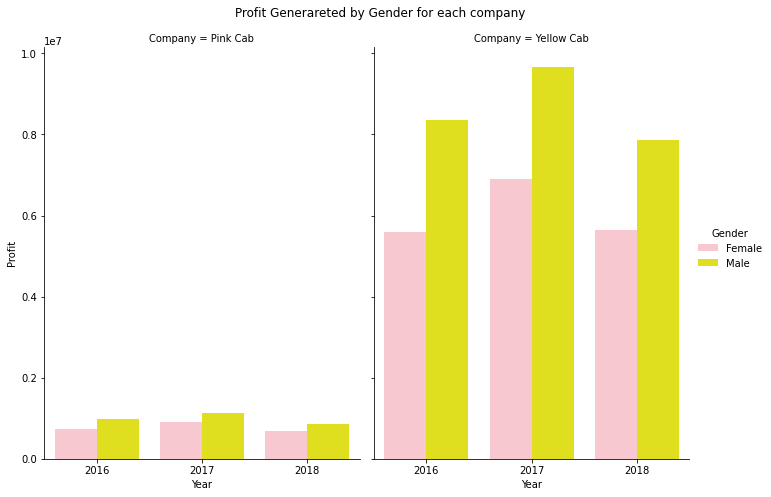

In [928]:
g = sns.catplot(x="Year", y="Profit",
                hue="Gender", col="Company",
                data=Profit_per_gender, kind="bar",
                height=7, aspect=.7,
                palette=sns.color_palette(['pink', 'yellow'])
                );
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Profit Generareted by Gender for each company')
plt.show()

In [488]:
Gender_influence = Final_Cab_Data.groupby(['Year','Company','Gender']).count()['Customer ID'].reset_index()
Gender_influence

,Year,Company,Gender,Customer ID
0,2016,Pink Cab,Female,10873
1,2016,Pink Cab,Male,14207
2,2016,Yellow Cab,Female,33861
3,2016,Yellow Cab,Male,48378
4,2017,Pink Cab,Female,13475
5,2017,Pink Cab,Male,16846
6,2017,Yellow Cab,Female,41785
7,2017,Yellow Cab,Male,56404
8,2018,Pink Cab,Female,13132
9,2018,Pink Cab,Male,16178


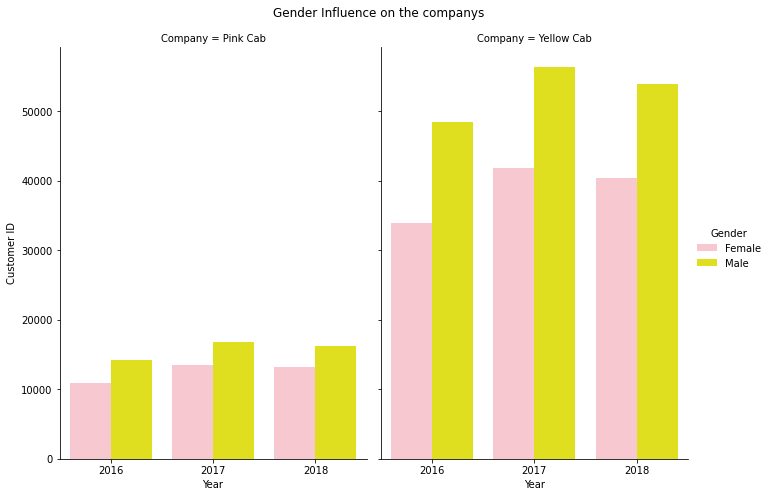

In [494]:
g = sns.catplot(x="Year", y="Customer ID",
                hue="Gender", col="Company",
                data=Gender_influence, kind="bar",
                height=7, aspect=.7,
                palette=sns.color_palette(['pink', 'yellow'])
                );
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Gender Influence on the companys')
plt.show()

In [485]:
Final_Cab_Data.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Year,Profit,Profit/KM,Profit_Margin
0,29290,Male,28,10813,10000011,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",2016,57.3150,1.882266,0.845491
1,29290,Male,28,10813,10351127,Cash,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701",2018,281.2772,10.739870,0.530187
2,29290,Male,28,10813,10412921,Card,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701",2018,194.6480,4.574571,0.754248
3,27703,Male,27,9237,10000012,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",2016,23.6660,0.826904,0.933990
4,27703,Male,27,9237,10320494,Card,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701",2018,253.9808,6.981330,0.647787


In [569]:
#Categorizing Age and Income
#Categories used
#Age: 18-25   : Young Adults,    Income: 2500-15000     
#     26-40  :  Adults,                  <2500                       
#     41-60  :  Old                      >15000                                           
#     60-150 :  Elderly

Final_Cab_Data['Age Group'] = pd.cut(Final_Cab_Data['Age'], bins = [17, 25, 40,60,150], labels = ['Young Adults', 'Adults', 'Old', 'Elderly'])
Final_Cab_Data['Income Category'] = pd.cut(Final_Cab_Data['Income (USD/Month)'], bins = [0,2501,15001,1000000], labels = ['Low Income', 'Middle Income', 'High Income'])
Final_Cab_Data.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Year,Profit,Profit/KM,Age Group,Income Category
0,29290,Male,28,10813,10000011,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",2016,57.3150,1.882266,Adults,Middle Income
1,29290,Male,28,10813,10351127,Cash,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701",2018,281.2772,10.739870,Adults,Middle Income
2,29290,Male,28,10813,10412921,Card,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701",2018,194.6480,4.574571,Adults,Middle Income
3,27703,Male,27,9237,10000012,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",2016,23.6660,0.826904,Adults,Middle Income
4,27703,Male,27,9237,10320494,Card,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701",2018,253.9808,6.981330,Adults,Middle Income


In [571]:
Final_Cab_Data.groupby(['Age Group']).min()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Year,Profit,Profit/KM,Income Category
Age Group,,,,,,,,,,,,,,,,,,
Young Adults,5,Female,18,2003,10000014,Card,2016-01-02,Pink Cab,ATLANTA GA,1.9,16.76,19.00,"1,030,185","12,421",2016,-145.9468,-4.121158,Low Income
Adults,1,Female,26,2000,10000011,Card,2016-01-02,Pink Cab,ATLANTA GA,1.9,15.60,19.00,"1,030,185","12,421",2016,-220.0600,-4.998235,Low Income
Old,10,Female,41,2007,10000013,Card,2016-01-02,Pink Cab,ATLANTA GA,1.9,16.38,19.19,"1,030,185","12,421",2016,-164.0400,-4.602523,Low Income
Elderly,20,Female,61,2027,10000023,Card,2016-01-02,Pink Cab,ATLANTA GA,1.9,19.48,19.38,"1,030,185","12,421",2016,-198.6980,-4.823954,Low Income


In [636]:
Profit_per_Income_class = Final_Cab_Data.groupby(['Year','Income Category','Company']).sum()['Profit'].unstack('Income Category')
Profit_per_Income_class

Income Category   Low Income  Middle Income   High Income
Year Company                                             
2016 Pink Cab     31721.6110   8.185457e+05  8.632439e+05
     Yellow Cab  258254.0784   6.802837e+06  6.865904e+06
2017 Pink Cab     41467.0500   9.956509e+05  9.965370e+05
     Yellow Cab  328235.5304   8.032485e+06  8.215257e+06
2018 Pink Cab     34025.2490   7.655554e+05  7.605816e+05
     Yellow Cab  258400.9172   6.579174e+06  6.679825e+06

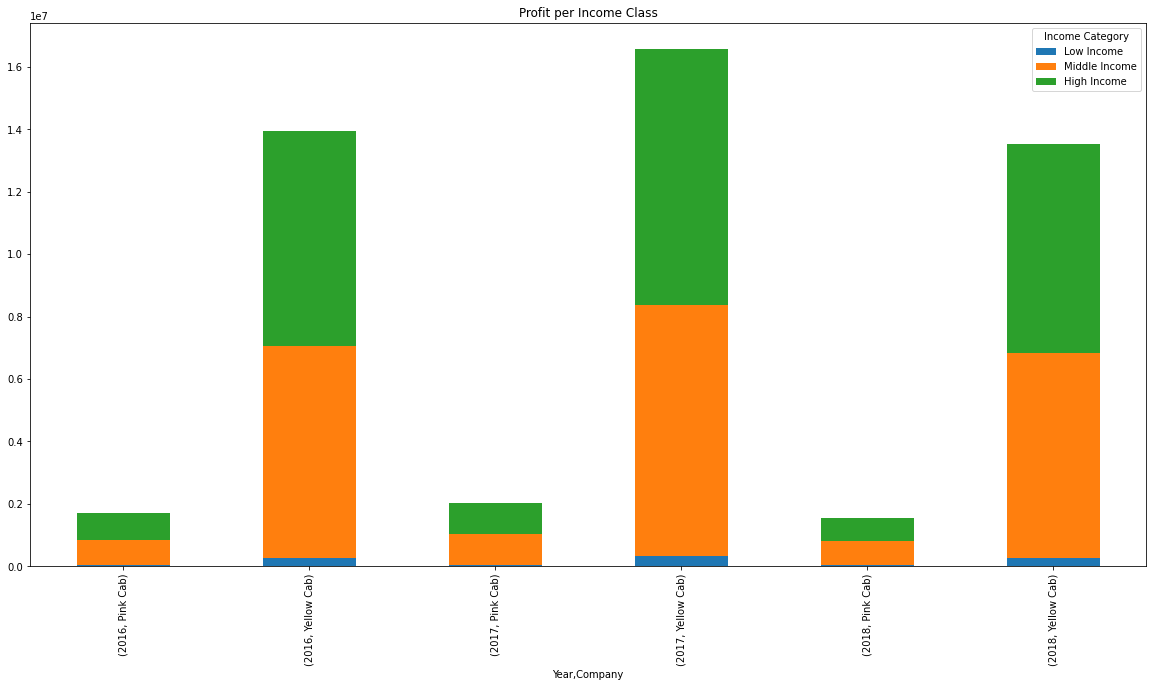

In [638]:
Profit_per_Income_class.plot(kind='bar',stacked=True,title='Profit per Income Class')
plt.show()

In [674]:
Profit_per_Income_class_total = Final_Cab_Data.groupby(['Income Category','Company']).sum()['Profit'].reset_index()
Profit_per_Income_class_total.stack()

0  Income Category       Low Income
   Company                 Pink Cab
   Profit                 107213.91
1  Income Category       Low Income
   Company               Yellow Cab
   Profit                844890.526
2  Income Category    Middle Income
   Company                 Pink Cab
   Profit               2579751.948
3  Income Category    Middle Income
   Company               Yellow Cab
   Profit             21414496.4204
4  Income Category      High Income
   Company                 Pink Cab
   Profit               2620362.463
5  Income Category      High Income
   Company               Yellow Cab
   Profit             21760986.2244
dtype: object

In [689]:
Profit_per_Age_group = Final_Cab_Data.groupby(['Year','Age Group','Company']).sum().unstack('Age Group')['Profit']
Profit_per_Age_group

Age Group        Young Adults        Adults           Old      Elderly
Year Company                                                          
2016 Pink Cab    4.394877e+05  8.133596e+05  3.652666e+05   95397.2910
     Yellow Cab  3.599932e+06  6.626638e+06  3.016118e+06  684307.7380
2017 Pink Cab    5.508750e+05  9.484490e+05  4.302286e+05  104102.3340
     Yellow Cab  4.324552e+06  7.794649e+06  3.620168e+06  836609.5820
2018 Pink Cab    4.143082e+05  7.391177e+05  3.256414e+05   81094.9880
     Yellow Cab  3.520292e+06  6.355699e+06  2.969382e+06  672026.1424

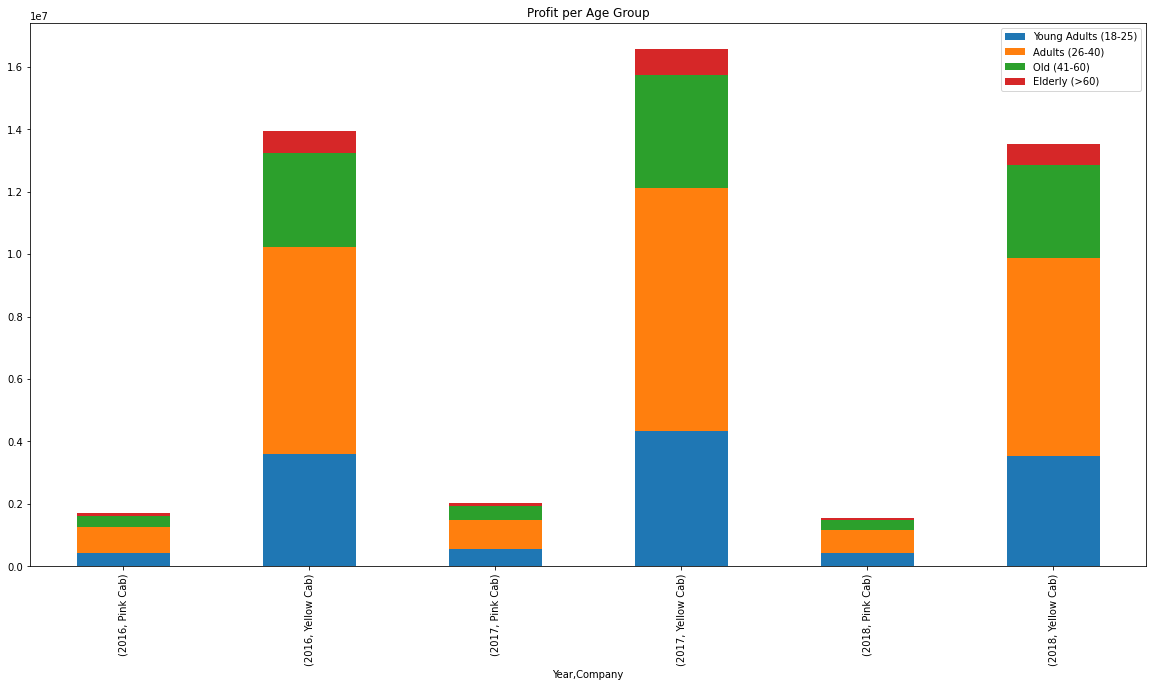

In [690]:
fig, ax = plt.subplots()
Profit_per_Age_group.plot(kind='bar',stacked=True,title='Profit per Age Group',ax=ax)
ax.legend(["Young Adults (18-25)", "Adults (26-40)","Old (41-60)","Elderly (>60)"])
plt.show()

In [712]:
Final_Cab_Data.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Year,Profit,Profit/KM,Age Group,Income Category
0,29290,Male,28,10813,10000011,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",2016,57.3150,1.882266,Adults,Middle Income
1,29290,Male,28,10813,10351127,Cash,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701",2018,281.2772,10.739870,Adults,Middle Income
2,29290,Male,28,10813,10412921,Card,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701",2018,194.6480,4.574571,Adults,Middle Income
3,27703,Male,27,9237,10000012,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",2016,23.6660,0.826904,Adults,Middle Income
4,27703,Male,27,9237,10320494,Card,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701",2018,253.9808,6.981330,Adults,Middle Income


In [782]:
Customer_dist_by_Age_group = Final_Cab_Data.groupby(['Year','Age Group','Company']).count()[['Customer ID']].reset_index()
Customer_dist_by_Age_group

,Year,Age Group,Company,Customer ID
0,2016,Young Adults,Pink Cab,6450
1,2016,Young Adults,Yellow Cab,21183
2,2016,Adults,Pink Cab,11898
3,2016,Adults,Yellow Cab,39052
4,2016,Old,Pink Cab,5341
5,2016,Old,Yellow Cab,17705
6,2016,Elderly,Pink Cab,1391
7,2016,Elderly,Yellow Cab,4299
8,2017,Young Adults,Pink Cab,8066
9,2017,Young Adults,Yellow Cab,25548


In [783]:
Customer_dist_by_Age_group['Percentage'] = 100 * Customer_dist_by_Age_group['Customer ID'] / Customer_dist_by_Age_group.groupby('Age Group')['Customer ID'].transform('sum')

In [784]:
Customer_dist_by_Age_group

,Year,Age Group,Company,Customer ID,Percentage
0,2016,Young Adults,Pink Cab,6450,6.909925
1,2016,Young Adults,Yellow Cab,21183,22.693478
2,2016,Adults,Pink Cab,11898,7.007315
3,2016,Adults,Yellow Cab,39052,22.999635
4,2016,Old,Pink Cab,5341,6.905602
5,2016,Old,Yellow Cab,17705,22.891535
6,2016,Elderly,Pink Cab,1391,7.355507
7,2016,Elderly,Yellow Cab,4299,22.732801
8,2017,Young Adults,Pink Cab,8066,8.641155
9,2017,Young Adults,Yellow Cab,25548,27.369729


In [785]:
100 * Customer_dist_by_Age_group['Customer ID']

0      645000
1     2118300
2     1189800
3     3905200
4      534100
5     1770500
6      139100
7      429900
8      806600
9     2554800
10    1423600
11    4622200
12     640500
13    2131600
14     161400
15     510300
16     760400
17    2449300
18    1385500
19    4453100
20     627000
21    2030600
22     158100
23     492300
Name: Customer ID, dtype: int64

In [786]:
Customer_dist_by_Age_group.drop('Customer ID', axis='columns',inplace=True)

In [787]:
Customer_dist_by_Age_groupp = Customer_dist_by_Age_group.groupby(['Year','Age Group','Company']).mean().unstack('Age Group').reset_index()
Customer_dist_by_Age_groupp

Year     Company   Percentage                                 
Age Group                   Young Adults     Adults        Old    Elderly
0          2016    Pink Cab     6.909925   7.007315   6.905602   7.355507
1          2016  Yellow Cab    22.693478  22.999635  22.891535  22.732801
2          2017    Pink Cab     8.641155   8.384277   8.281292   8.534715
3          2017  Yellow Cab    27.369729  27.222399  27.560348  26.984295
4          2018    Pink Cab     8.146212   8.159888   8.106745   8.360214
5          2018  Yellow Cab    26.239501  26.226486  26.254477  26.032468

In [796]:
Customer_dist_by_Age_groupp['Year'] = Customer_dist_by_Age_groupp['Year'].astype(str)
Customer_dist_by_Age_groupp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   (Year, )                    6 non-null      object 
 1   (Company, )                 6 non-null      object 
 2   (Percentage, Young Adults)  6 non-null      float64
 3   (Percentage, Adults)        6 non-null      float64
 4   (Percentage, Old)           6 non-null      float64
 5   (Percentage, Elderly)       6 non-null      float64
dtypes: float64(4), object(2)
memory usage: 416.0+ bytes


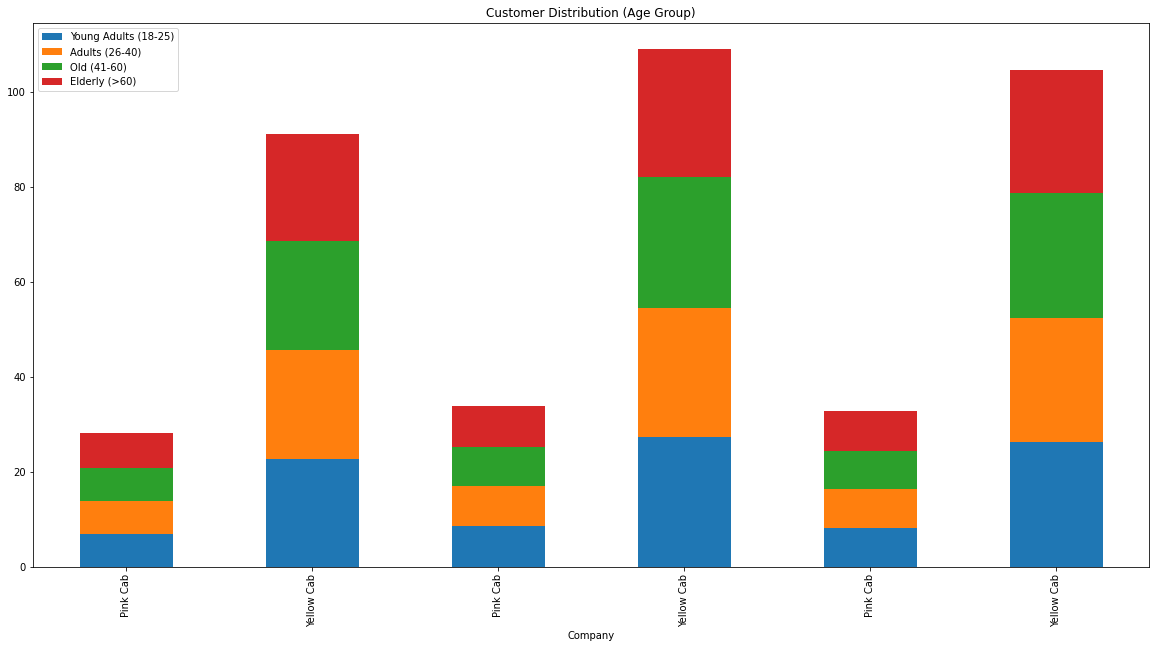

In [799]:
fig, ax = plt.subplots()
Customer_dist_by_Age_groupp.plot(x='Company',kind='bar',stacked=True,title='Customer Distribution (Age Group)',ax=ax)
ax.legend(["Young Adults (18-25)", "Adults (26-40)","Old (41-60)","Elderly (>60)"])
plt.show()

In [811]:
Customer_Retention = Final_Cab_Data.groupby(['Year','Customer ID','Company']).count()['Transaction ID'].reset_index()
Customer_Retention

,Year,Customer ID,Company,Transaction ID
0,2016,1,Pink Cab,1
1,2016,1,Yellow Cab,8
2,2016,2,Pink Cab,2
3,2016,2,Yellow Cab,11
4,2016,3,Pink Cab,2
...,...,...,...,...
134895,2018,59998,Yellow Cab,2
134896,2018,59999,Pink Cab,2
134897,2018,59999,Yellow Cab,4
134898,2018,60000,Pink Cab,1


In [821]:
Customer_Retentionn = Customer_Retention[Customer_Retention['Transaction ID'] > 5].groupby(['Year','Company']).count().reset_index()
Customer_Retentionn

,Year,Company,Customer ID,Transaction ID
0,2016,Pink Cab,60,60
1,2016,Yellow Cab,4534,4534
2,2017,Pink Cab,135,135
3,2017,Yellow Cab,5894,5894
4,2018,Pink Cab,110,110
5,2018,Yellow Cab,5647,5647


In [825]:
100 * Customer_Retentionn['Customer ID'] / Customer_Retentionn.groupby('Company')['Customer ID'].transform('sum')

0    19.672131
1    28.205288
2    44.262295
3    36.665630
4    36.065574
5    35.129082
Name: Customer ID, dtype: float64

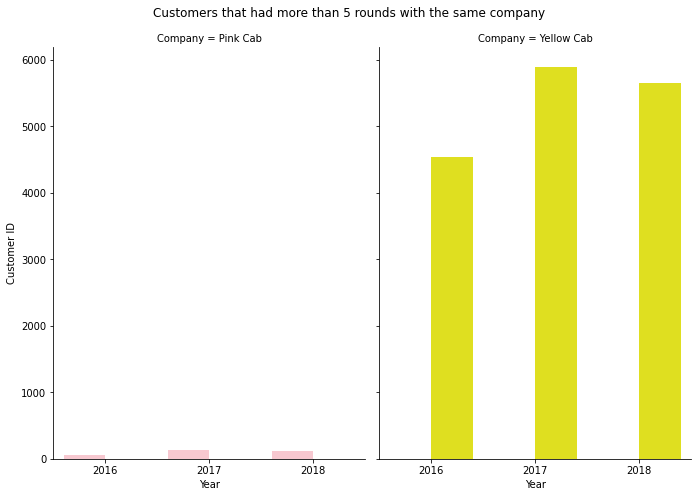

In [824]:
g = sns.catplot(x="Year", y="Customer ID",
                hue="Company", col="Company",
                data=Customer_Retentionn, kind="bar",
                height=7, aspect=.7,
                palette=sns.color_palette(['pink', 'yellow'])
                );
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Customers that had more than 5 rounds with the same company')
plt.show()

In [893]:
Final_Cab_Data['Day'] = Final_Cab_Data['Date of Travel'].dt.day

In [894]:
Final_Cab_Data['Quarter'] = Final_Cab_Data['Date of Travel'].dt.quarter

In [901]:
Daily_profit_data = Final_Cab_Data.groupby(['Company','Day']).mean().reset_index()
Daily_profit_data

,Company,Day,Customer ID,Age,Income (USD/Month),Transaction ID,KM Travelled,Price Charged,Cost of Trip,Population,Users,Year,Profit,Profit/KM,Quarter
0,Pink Cab,1,18740.306087,35.469913,14896.249043,1.022938e+07,22.539179,314.357068,247.650018,2.327171e+06,124372.857391,2017.106783,66.707050,2.918544,2.985739
1,Pink Cab,2,18396.979730,35.180556,15429.061186,1.022017e+07,22.545428,308.315068,247.694493,2.261812e+06,122773.490991,2017.090465,60.620574,2.683011,2.801802
2,Pink Cab,3,17914.815621,35.107875,14905.633483,1.021907e+07,23.159882,326.264923,254.848867,2.386358e+06,127346.346991,2017.035211,71.416056,3.071340,2.888924
3,Pink Cab,4,18736.954688,35.357813,15114.454687,1.021515e+07,22.677801,305.249340,249.118441,2.239528e+06,122343.051562,2017.037109,56.130899,2.527034,2.758594
4,Pink Cab,5,18951.146719,35.319156,14791.936696,1.023451e+07,22.012216,309.353103,241.891395,2.222981e+06,121539.411144,2017.168480,67.461707,3.058307,2.578635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Yellow Cab,27,19418.253507,35.404220,14888.265739,1.022153e+07,22.759484,454.948698,300.378100,3.333999e+06,166930.338570,2017.037818,154.570599,6.805307,2.837504
58,Yellow Cab,28,19538.899286,35.494789,15200.207636,1.022822e+07,22.610490,454.576356,298.469468,3.326955e+06,166693.811336,2017.087949,156.106888,6.837333,2.770816
59,Yellow Cab,29,18908.833916,35.172741,15212.446237,1.023386e+07,22.787536,461.813633,300.825380,3.471761e+06,170029.319869,2017.045019,160.988253,7.115965,3.008236
60,Yellow Cab,30,19224.741488,35.172142,14990.202724,1.021732e+07,22.455831,454.294984,296.692022,3.375262e+06,168996.686895,2017.005137,157.602962,7.041808,2.791542


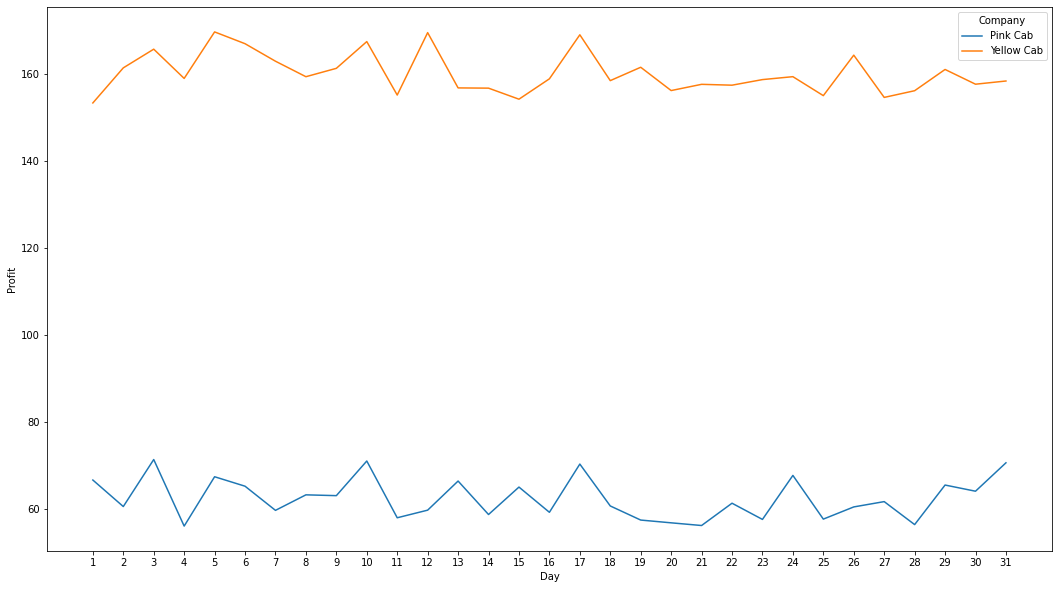

In [905]:
plt.figure(figsize=(18,10))
g = sns.lineplot(data=Daily_profit_data, x='Day',y='Profit',hue='Company')
g.set(xticks=([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]))
plt.show()

In [909]:
Profit_per_quarter = Final_Cab_Data.groupby(['Year','Company','Quarter']).sum()['Profit'].unstack('Company').reset_index()
Profit_per_quarter

Company,Year,Quarter,Pink Cab,Yellow Cab
0,2016,1,249229.590,2.760242e+06
1,2016,2,215246.063,3.479802e+06
2,2016,3,381375.523,3.197748e+06
3,2016,4,867660.048,4.489204e+06
4,2017,1,358923.005,3.602691e+06
5,2017,2,256717.349,3.924204e+06
6,2017,3,466195.359,3.760759e+06
7,2017,4,951819.195,5.288324e+06
8,2018,1,331039.887,3.122696e+06
9,2018,2,175183.830,3.235419e+06


In [910]:
PQ1 = Profit_per_quarter[Profit_per_quarter['Year'] == 2016]
PQ2 = Profit_per_quarter[Profit_per_quarter['Year'] == 2017]
PQ3 = Profit_per_quarter[Profit_per_quarter['Year'] == 2018]

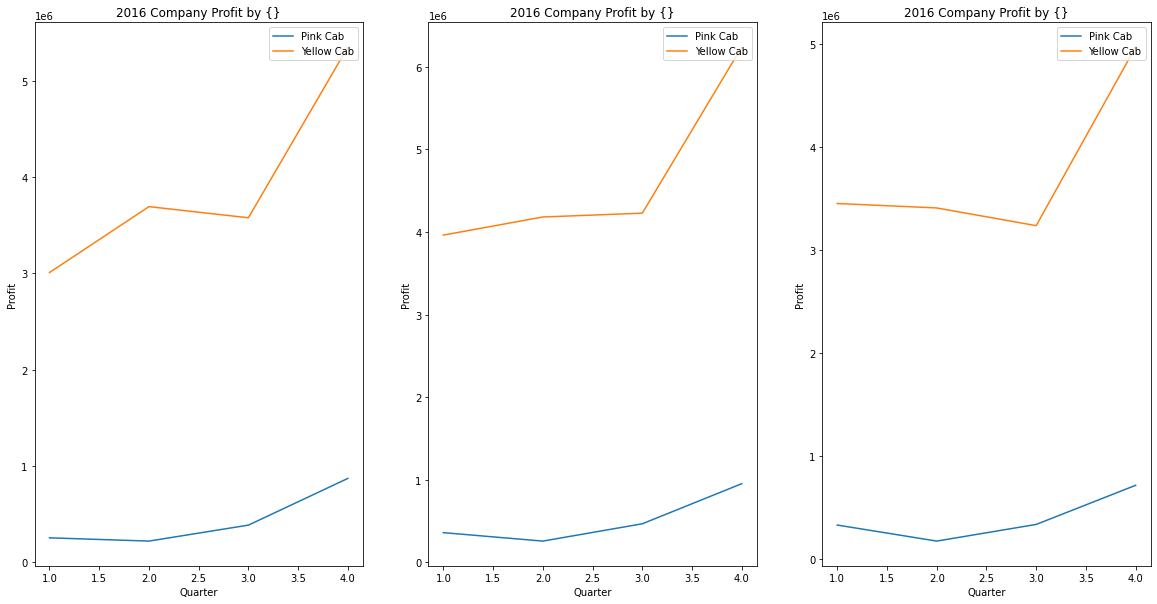

In [919]:
fig,ax = plt.subplots(1,3)
fig.figsize=(18,12)
PQ1.iloc[:,1:].plot(x='Quarter',kind='line', stacked=True,ax=ax[0],title='2016 Company Profit by {}',
                ylabel='Profit').legend(loc='upper right')
PQ2.iloc[:,1:].plot(x='Quarter',kind='line', stacked=True,ax=ax[1],title='2016 Company Profit by {}',
                ylabel='Profit').legend(loc='upper right')
PQ3.iloc[:,1:].plot(x='Quarter',kind='line', stacked=True,ax=ax[2],title='2016 Company Profit by {}',
                ylabel='Profit').legend(loc='upper right')
plt.show()

### Recommendations
1. Profit Share: The data shows that Yellow cab has a higher profit margin that Red cab in all the states, although this might be as a result of having more rides in each city than Red cab 
2. Customer Retention: From the data shown above, it is evident that Yellow cab seems to retain customer more than Reb cab does
3. Age Wise Reach: Yellow cab has more customers in the 60+ category and 18-25 age category than every other category.
4. Average Profit per KM: Yellow taxi records thrice as much Average Profit per KM than the red taxi
<br><br>
N/B: With the above points, We will recommend the yellow cab for investment